----

# **Demonstrate BOTURA Feature Selection**

## **Author**   :  **Muhammad Adil Naeem**

## **Contact**   :   **madilnaeem0@gmail.com**
<br>

----

------

Boruta is a feature selection algorithm that aims to identify all relevant features in a dataset. It is particularly useful when dealing with high-dimensional data, where the number of features may exceed the number of observations. Here are key points about Boruta:

### Key Features of Boruta:

1. **Random Forest-Based**: Boruta is built on the Random Forest algorithm, leveraging its ability to assess the importance of features.

2. **Shadow Features**: It creates shadow features by permuting the original features, which helps in determining whether a feature is significantly important compared to random noise.

3. **Iterative Process**: Boruta works iteratively:
   - In each iteration, it compares the importance of original features with shadow features.
   - Features are classified as "important," "unimportant," or "tentative" based on their importance scores.

4. **All-Relevant Feature Selection**: Unlike some methods that aim to find a minimal subset of features, Boruta seeks to identify all features that carry useful information for the model.

5. **Stopping Criterion**: The process continues until all features are either confirmed as important or deemed unimportant, or until a specified number of iterations is reached.

6. **User-Friendly**: It provides a clear output, allowing users to easily see which features are selected and offers visualizations for deeper insights.

### Applications:
- Boruta is commonly used in various fields, such as bioinformatics, finance, and any scenario where feature selection is crucial for model performance and interpretability.

### Implementation:
Boruta can be implemented using the `BorutaPy` library in Python. Here's an example of how to use it:

```python
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Initialize Boruta
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_selector = BorutaPy(
    estimator=rf,
    n_estimators='auto',
    verbose=2,
    random_state=1
)

# Fit Boruta
boruta_selector.fit(X_train.values, y_train)

# Transform the dataset
X_imp_train = boruta_selector.transform(X_train.values)
X_imp_test = boruta_selector.transform(X_test.values)
```

### Summary
Boruta is a powerful and effective tool for feature selection that helps in improving model performance by identifying all relevant features while managing high-dimensional data.


------

## **Football Dataset**

This dataset appears to contain performance statistics for football (soccer) players, categorized by their position. Here’s a breakdown of its features in tabular format:

| Feature               | Description                                                                                   |
|-----------------------|-----------------------------------------------------------------------------------------------|
| **Position**          | The player's position on the field (e.g., Midfielder, Defender, Forward).                   |
| **Clean sheets**      | The number of matches in which the player’s team did not concede any goals.                  |
| **Goals conceded**    | The total number of goals conceded by the player’s team while the player was on the field.   |
| **Tackles**          | The number of tackles made by the player.                                                   |
| **Tackle success %**  | The percentage of successful tackles made by the player.                                      |
| **Blocked shots**     | The number of shots blocked by the player.                                                   |
| **Interceptions**     | The number of times the player intercepted the ball.                                         |
| **Clearances**        | The total number of times the player cleared the ball from the defensive area.                |
| **Recoveries**        | The number of times the player regained possession of the ball after a loss.                 |
| **Successful 50/50s** | The number of successful 50/50 challenges won by the player.                                  |
| **Shots**             | The total number of shots taken by the player.                                              |
| **Shooting accuracy %**| The percentage of shots taken that were on target.                                          |
| **Saves**             | The number of saves made by the player (typically relevant for goalkeepers).                 |
| **Penalties saved**   | The number of penalty shots saved by the player (also typically relevant for goalkeepers).    |
| **Age**               | The age of the player.                                                                        |
| **value_eur**        | The market value of the player in euros.                                                    |
| **overall**           | The overall rating/skill level of the player.                                               |
| **Aerial Saves**      | The number of saves made by the player from aerial shots (again, mainly for goalkeepers).    |
| **Duels %**          | The percentage of duels won by the player.                                                  |
| **Aerial battles %**  | The percentage of aerial battles won by the player.                                          |

### Summary
- **Player Positions**: The dataset features players in various positions, each contributing differently to their team's performance.
- **Performance Metrics**: It includes various performance metrics, making it useful for analyzing player effectiveness in defense, midfield, and attack.
- **Statistical Analysis**: The data can be used for deeper statistical analysis, such as correlation between player age and performance metrics, or comparing players across different positions.

### **Importing Libararies**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### **Load the Dataset**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Aditya1001001/English-Premier-League/master/pos_modelling_data.csv')

### **First 5 Rows of Dataset**

In [5]:
df.head()

,Position,Clean sheets,Goals conceded,Tackles,Tackle success %,Blocked shots,Interceptions,Clearances,Recoveries,Successful 50/50s,...,Shots,Shooting accuracy %,Saves,Penalties saved,age,value_eur,overall,Arial Saves,Duels %,Aerial battles %
0,Midfielder,0.0,0.0,4.0,100,0.0,1.0,0.0,9.0,4.0,...,2.0,50,0.0,0.0,21,4400000,72,0.0,46.153846,25.000000
1,Defender,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,22,10500000,77,0.0,0.000000,0.000000
2,Forward,0.0,0.0,10.0,0,11.0,1.0,19.0,0.0,0.0,...,42.0,36,0.0,0.0,19,7500000,73,0.0,0.000000,0.000000
3,Midfielder,0.0,0.0,9.0,56,3.0,9.0,14.0,40.0,12.0,...,10.0,30,0.0,0.0,31,4800000,74,0.0,55.384615,58.333333
4,Midfielder,0.0,0.0,22.0,59,5.0,14.0,0.0,58.0,6.0,...,11.0,18,0.0,0.0,28,0,83,0.0,40.869565,36.666667


### **Detailed Information AAbout Dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Position             1793 non-null   object 
 1   Clean sheets         1793 non-null   float64
 2   Goals conceded       1793 non-null   float64
 3   Tackles              1793 non-null   float64
 4   Tackle success %     1793 non-null   int64  
 5   Blocked shots        1793 non-null   float64
 6   Interceptions        1793 non-null   float64
 7   Clearances           1793 non-null   float64
 8   Recoveries           1793 non-null   float64
 9   Successful 50/50s    1793 non-null   float64
 10  Own goals            1793 non-null   float64
 11  Assists              1793 non-null   int64  
 12  Passes               1793 non-null   int64  
 13  Passes per match     1793 non-null   float64
 14  Big chances created  1793 non-null   float64
 15  Crosses              1793 non-null   f

### **Check Missing Values**

In [7]:
df.isnull().sum()

,0
Position,0
Clean sheets,0
Goals conceded,0
Tackles,0
Tackle success %,0
Blocked shots,0
Interceptions,0
Clearances,0
Recoveries,0
Successful 50/50s,0


In [16]:
df['Position'].unique()

array(['Midfielder', 'Defender', 'Forward', 'Goalkeeper'], dtype=object)

### **Staistical Description of Numerical Columns**

In [8]:
df.describe()

,Clean sheets,Goals conceded,Tackles,Tackle success %,Blocked shots,Interceptions,Clearances,Recoveries,Successful 50/50s,Own goals,...,Shots,Shooting accuracy %,Saves,Penalties saved,age,value_eur,overall,Arial Saves,Duels %,Aerial battles %
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,...,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1.793000e+03,1793.000000,1793.000000,1793.000000,1793.000000
mean,1.223648,6.650864,15.761852,26.344674,3.006135,10.674847,33.656442,44.687117,6.324596,0.037368,...,8.832683,10.375906,2.132181,0.021194,24.815951,8.041180e+06,72.273285,0.857780,23.366143,21.077817
std,2.910813,14.295850,22.674365,31.983054,5.330114,16.494443,66.502829,68.663336,12.879054,0.222225,...,18.646707,18.164007,13.827333,0.184794,4.458343,1.141322e+07,7.557373,5.781587,27.133915,26.857658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000e+00,47.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000e+06,67.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,4.500000e+06,74.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,27.000000,59.000000,4.000000,17.000000,36.000000,79.000000,7.000000,0.000000,...,8.000000,20.000000,0.000000,0.000000,28.000000,1.000000e+07,77.000000,0.000000,51.086957,47.619048
max,20.000000,71.000000,142.000000,100.000000,48.000000,86.000000,568.000000,345.000000,102.000000,4.000000,...,184.000000,100.000000,144.000000,3.000000,39.000000,1.020000e+08,91.000000,82.000000,100.000000,100.000000


### **Splitting Data into X and y**

In [9]:
X = df.drop('Position', axis=1)
y = df['Position']

### **Splitting Data into Train and Test**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### **Fit the RandomForestClassifier model**

In [11]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000,max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

### **Evaluate the Model**

In [13]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, rfc.predict(X_test)))

Accuracy: 0.7298050139275766


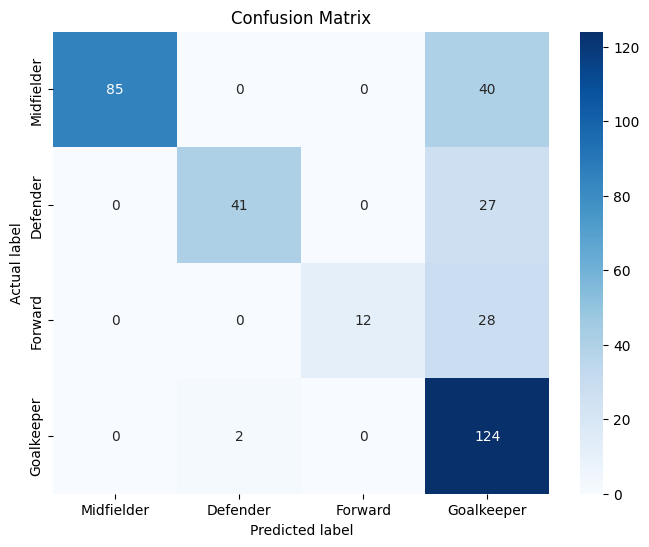

In [18]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, rfc.predict(X_test))

# Define class names
class_names = ['Midfielder', 'Defender', 'Forward', 'Goalkeeper']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Classification Report
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

    Defender       1.00      0.68      0.81       125
     Forward       0.95      0.60      0.74        68
  Goalkeeper       1.00      0.30      0.46        40
  Midfielder       0.57      0.98      0.72       126

    accuracy                           0.73       359
   macro avg       0.88      0.64      0.68       359
weighted avg       0.84      0.73      0.73       359



## **Let's Apply boruta for RandomForest model**

In [20]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000,max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	29
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	29
Tentative: 	3
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	29
Tentative: 	3
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	29
Tentative: 	3
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	30
Tentative: 	2
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	30
Tentative: 	2
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	30
Tentative: 	2
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	30
Tentative: 	2
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	30
Tentative: 	2
Rejected: 	2
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=160,
                                          random_state=RandomState(MT19937) at 0x7AFE91DE9640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7AFE91DE9640, verbose=2)

In [21]:
# Checking rankings and no of significents feature
print('Rankings: ',boruta_selector.ranking_)
print('No of Significant Features: ',boruta_selector.n_features_)

Rankings:  [1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 2 1 1 1 1 1 1]
No of Significant Features:  31


In [26]:
# Create a DataFrame with feature names, rankings, and number of important features
selected_rf_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': boruta_selector.ranking_,
})

# Sort the DataFrame by Ranking
sorted_features = selected_rf_features.sort_values(by='Ranking')
sorted_features

,Feature,Ranking
0,Clean sheets,1
31,Arial Saves,1
30,overall,1
29,value_eur,1
28,age,1
26,Saves,1
25,Shooting accuracy %,1
24,Shots,1
23,Goals per match,1
22,Goals,1


In [27]:
X_imp_train = boruta_selector.transform(np.array(X_train))
X_imp_test = boruta_selector.transform(np.array(X_test))

- This code uses the Boruta feature selector to transform the training (`X_imp_train`) and test (`X_imp_test`) datasets by retaining only the important features identified during the Boruta selection process. It converts the DataFrames `X_train` and `X_test` into NumPy arrays before applying the transformation.

## **Fit RandomForest Classifier on Boruta Features**

In [28]:
rf_boruta = RandomForestClassifier(random_state=1, n_estimators=1000,max_depth=5)
rf_boruta.fit(X_imp_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

### **Evaluate the Modefied model**

In [29]:
# Accuracy
print('Accuracy:', accuracy_score(y_test, rf_boruta.predict(X_imp_test)))

Accuracy: 0.7325905292479109


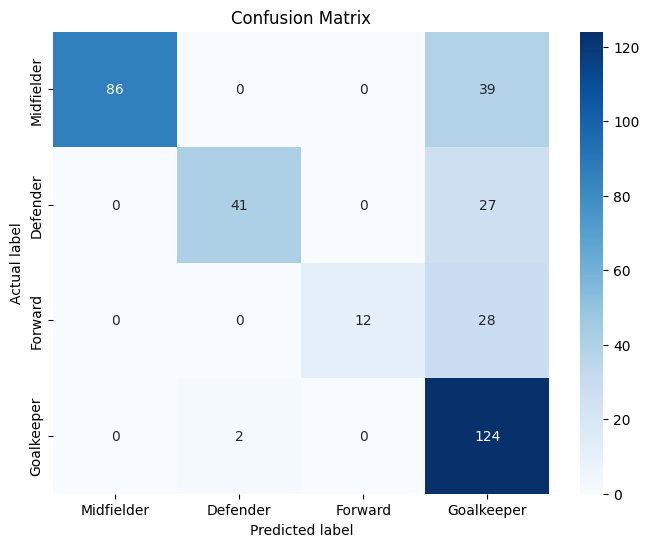

In [30]:
# Calculate confusion matrix using the new model
cm = confusion_matrix(y_test, rf_boruta.predict(X_imp_test))

# Define class names
class_names = ['Midfielder', 'Defender', 'Forward', 'Goalkeeper']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Classification Report
print(classification_report(y_test, rf_boruta.predict(X_imp_test)))

              precision    recall  f1-score   support

    Defender       1.00      0.69      0.82       125
     Forward       0.95      0.60      0.74        68
  Goalkeeper       1.00      0.30      0.46        40
  Midfielder       0.57      0.98      0.72       126

    accuracy                           0.73       359
   macro avg       0.88      0.64      0.68       359
weighted avg       0.84      0.73      0.73       359

